In [1]:
import numpy as np
import pandas as pd
import itertools
from typing import List, Optional
import matplotlib.pyplot as plt

# Data load

In [2]:
df = pd.read_csv('study.csv')
df.head()

,individual,Ng10.a,Ng10.b,Ng18.a,Ng18.b,Ng8.a,Ng8.b,Bd12.a,Bd12.b,Ng20.a,...,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield,variety
0,1,1,1,4,4,2,2,2,2,1,...,1.52,78.0,44.0,13,23.18,3.39,48.08,135.00,624.98,cayenne
1,2,1,1,4,4,2,2,2,2,1,...,1.36,74.0,45.0,9,25.05,3.08,48.10,164.00,432.90,cayenne
2,3,1,1,3,3,2,2,2,2,1,...,1.43,69.0,63.0,8,17.75,2.03,19.05,47.00,152.40,cayenne
3,4,1,1,4,4,2,2,2,2,1,...,1.53,68.0,44.0,12,21.50,3.04,46.58,156.00,558.90,cayenne
4,5,1,1,4,4,2,2,2,2,1,...,1.34,84.0,44.0,6,24.88,3.38,54.05,148.33,324.30,cayenne


# Data split by type

## Genotypes

In [3]:
gen = df.iloc[:, 0:15].astype(str)
gen.head()

,individual,Ng10.a,Ng10.b,Ng18.a,Ng18.b,Ng8.a,Ng8.b,Bd12.a,Bd12.b,Ng20.a,Ng20.b,Ng6.a,Ng6.b,Ng7.a,Ng7.b
0,1,1,1,4,4,2,2,2,2,1,1,2,2,0,0
1,2,1,1,4,4,2,2,2,2,1,1,2,2,0,0
2,3,1,1,3,3,2,2,2,2,1,1,2,2,2,2
3,4,1,1,4,4,2,2,2,2,1,1,2,2,2,2
4,5,1,1,4,4,2,2,2,2,1,1,2,2,2,2


In [4]:
gen.dtypes

individual    object
Ng10.a        object
Ng10.b        object
Ng18.a        object
Ng18.b        object
Ng8.a         object
Ng8.b         object
Bd12.a        object
Bd12.b        object
Ng20.a        object
Ng20.b        object
Ng6.a         object
Ng6.b         object
Ng7.a         object
Ng7.b         object
dtype: object

## Morphological traits

In [5]:
mor = pd.concat([df.iloc[:, [0]], df.iloc[:, 15:-1]], axis=1)
mor.head()

,individual,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1,1.52,78.0,44.0,13,23.18,3.39,48.08,135.00,624.98
1,2,1.36,74.0,45.0,9,25.05,3.08,48.10,164.00,432.90
2,3,1.43,69.0,63.0,8,17.75,2.03,19.05,47.00,152.40
3,4,1.53,68.0,44.0,12,21.50,3.04,46.58,156.00,558.90
4,5,1.34,84.0,44.0,6,24.88,3.38,54.05,148.33,324.30


In [6]:
mor.dtypes

individual            int64
stem_width          float64
stem_height         float64
first_flower_day    float64
fruits_number         int64
fruit_length        float64
fruit_diameter      float64
fruit_weight        float64
seeds_number        float64
yield               float64
dtype: object

In [7]:
gen3 = gen.iloc[:3, :]
gen3.head()

,individual,Ng10.a,Ng10.b,Ng18.a,Ng18.b,Ng8.a,Ng8.b,Bd12.a,Bd12.b,Ng20.a,Ng20.b,Ng6.a,Ng6.b,Ng7.a,Ng7.b
0,1,1,1,4,4,2,2,2,2,1,1,2,2,0,0
1,2,1,1,4,4,2,2,2,2,1,1,2,2,0,0
2,3,1,1,3,3,2,2,2,2,1,1,2,2,2,2


In [8]:
df = gen
bases = sorted({col[:-2] for col in df.columns if col.endswith(('.a', '.b'))})

new_df = pd.DataFrame()

for base in bases:
    col_a = base + ".a"
    col_b = base + ".b"
    
    # combine values into a comma-separated string
    new_df[base] = df[col_a].astype(str) + "," + df[col_b].astype(str)

print(new_df)

    Bd12 Ng10 Ng18 Ng20  Ng6  Ng7  Ng8
0    2,2  1,1  4,4  1,1  2,2  0,0  2,2
1    2,2  1,1  4,4  1,1  2,2  0,0  2,2
2    2,2  1,1  3,3  1,1  2,2  2,2  2,2
3    2,2  1,1  4,4  1,1  2,2  2,2  2,2
4    2,2  1,1  4,4  1,1  2,2  2,2  2,2
..   ...  ...  ...  ...  ...  ...  ...
109  2,2  2,2  2,2  1,1  1,1  3,3  1,1
110  0,0  2,2  2,2  1,1  1,1  3,3  1,1
111  1,1  2,2  2,2  1,1  1,1  3,3  1,1
112  1,1  2,2  2,2  1,1  1,1  3,3  1,1
113  2,2  0,0  2,2  1,1  1,1  3,3  1,1

[114 rows x 7 columns]


In [9]:
import pandas as pd
import itertools

def pairwise_row_matches(df):
    results = []
    row_pairs = list(itertools.combinations(range(len(df)), 2))

    for i, j in row_pairs:
        row_i = df.iloc[i].astype(str)
        row_j = df.iloc[j].astype(str)

        total_matches = 0

        for col in df.columns:
            # Split by comma → ['2','2'], ['2','3'], etc.
            elems_i = row_i[col].split(",")
            elems_j = row_j[col].split(",")

            # Count element-wise matches (pairwise position)
            matches = sum(a == b for a, b in zip(elems_i, elems_j))
            total_matches += matches

        results.append({
            "Comparison": f"{i+1}_{j+1}",
            "Matches": total_matches
        })
    
    return pd.DataFrame(results)

In [10]:
import pandas as pd
import itertools
from typing import Iterable

def pairwise_relatedness(df: pd.DataFrame, decimals: int = 4) -> pd.DataFrame:
    """
    For every pair of rows in df, compute relatedness = matches / total_possible_elements.
    - Cells are split by comma and stripped of surrounding whitespace.
    - Matches are counted position-wise; missing positions count as non-matches.
    - total_possible_elements per column = max(len(elems_row_i), len(elems_row_j))
    Returns a DataFrame with columns: Comparison, relatedness (float between 0 and 1).
    """
    def split_cell(cell: object) -> list:
        # handle NaN, None, numeric values, etc.
        if pd.isna(cell):
            return []
        s = str(cell)
        # if empty string after stripping → no elements
        s = s.strip()
        if s == "":
            return []
        # split on comma and strip spaces from each element
        return [elem.strip() for elem in s.split(",")]

    results = []
    nrows = len(df)
    row_pairs = list(itertools.combinations(range(nrows), 2))

    # Pre-split all cells for speed
    split_cache = {
        r: {col: split_cell(df.iloc[r][col]) for col in df.columns}
        for r in range(nrows)
    }

    for i, j in row_pairs:
        total_matches = 0
        total_possible = 0

        for col in df.columns:
            elems_i = split_cache[i][col]
            elems_j = split_cache[j][col]

            max_len = max(len(elems_i), len(elems_j))
            total_possible += max_len

            # Compare position-wise: pad shorter with None
            for k in range(max_len):
                a = elems_i[k] if k < len(elems_i) else None
                b = elems_j[k] if k < len(elems_j) else None
                if a is not None and b is not None and a == b:
                    total_matches += 1
                # else: no match (including cases where one is None)

        # avoid division by zero (if total_possible==0, set relatedness to 0)
        relatedness = (total_matches / total_possible) if total_possible > 0 else 0.0
        results.append({
            "Comparison": f"{i+1}_{j+1}",
            "relatedness": round(relatedness, decimals)
        })

    return pd.DataFrame(results)

In [11]:
r = pairwise_relatedness(df)

In [12]:
r

,Comparison,relatedness
0,1_2,0.9333
1,1_3,0.6667
2,1_4,0.8000
3,1_5,0.8000
4,1_6,0.6667
...,...,...
6436,111_113,0.8000
6437,111_114,0.6667
6438,112_113,0.9333
6439,112_114,0.6667


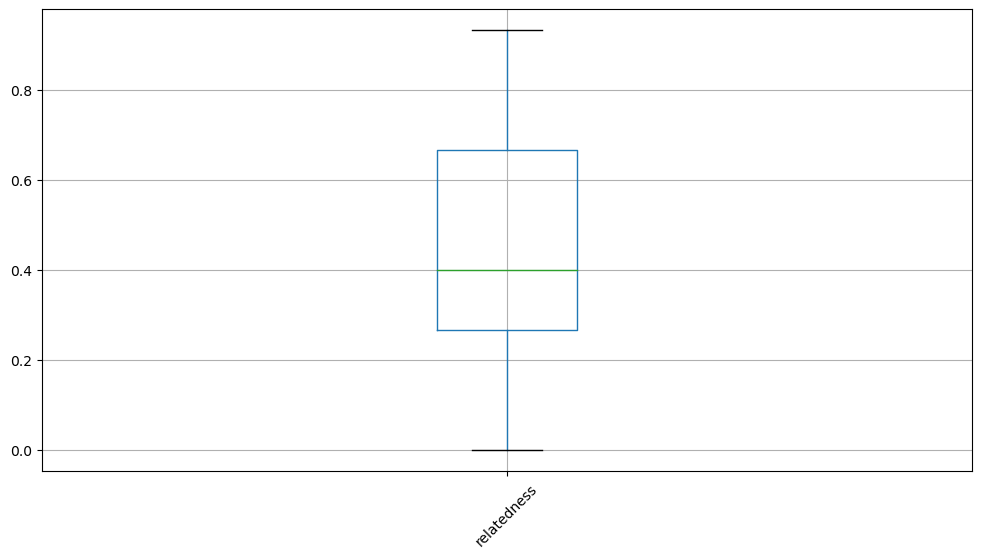

In [13]:
r.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

In [35]:
mor.head()

,individual,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1,1.52,78.0,44.0,13,23.18,3.39,48.08,135.00,624.98
1,2,1.36,74.0,45.0,9,25.05,3.08,48.10,164.00,432.90
2,3,1.43,69.0,63.0,8,17.75,2.03,19.05,47.00,152.40
3,4,1.53,68.0,44.0,12,21.50,3.04,46.58,156.00,558.90
4,5,1.34,84.0,44.0,6,24.88,3.38,54.05,148.33,324.30


In [15]:
t_mean = mor['stem_width'].mean()
t_var = mor['stem_width'].var()
print('Mean:', t_mean)
print('Variance:', t_var)

Mean: 1.8069298245614034
Variance: 0.6089488976866947


In [20]:
t = mor['stem_width'] 
t1 = t  - t_mean
print(t1)

0     -0.28693
1     -0.44693
2     -0.37693
3     -0.27693
4     -0.46693
        ...   
109   -0.51693
110   -1.03693
111   -0.28693
112   -0.76693
113   -1.11693
Name: stem_width, Length: 114, dtype: float64


In [25]:
import pandas as pd
import itertools
from typing import List, Optional

def phenotypic_similarity_safe(
    df: pd.DataFrame,
    trait_cols: Optional[List[str]] = None,
    decimals: int = 4,
    ddof: int = 0
) -> pd.DataFrame:
    """
    Robust phenotypic similarity per trait for each pair of rows.

    For each trait column k and pair of individuals i,j the function computes:
        similarity_k = (x_i_k - mean_k) * (x_j_k - mean_k) / var_k

    - If trait_cols is None, numeric columns (except 'individual') are used.
    - Means and variances are computed per column. var uses ddof (default ddof=0, population variance).
    - If var_k == 0 (or NaN) the similarity for that trait is set to 0 to avoid division by zero.
    - If either value is NaN, the similarity for that trait is NaN.
    - Returns a DataFrame with rows for each pair "i_j" (1-based) and a column per trait.
    """
    # Defensive copy of column names
    cols = list(df.columns)

    # Validate explicit trait_cols if provided
    if trait_cols is not None:
        if not isinstance(trait_cols, (list, tuple)):
            raise TypeError("trait_cols must be a list/tuple of column names or None.")
        missing = [c for c in trait_cols if c not in cols]
        if missing:
            raise KeyError(f"The following requested columns do not exist in the DataFrame: {missing}")
        non_numeric = [c for c in trait_cols if not pd.api.types.is_numeric_dtype(df[c])]
        if non_numeric:
            raise TypeError(f"The following columns are not numeric: {non_numeric}")
        selected_traits = list(trait_cols)
    else:
        # auto-select numeric columns excluding 'individual' if present
        selected_traits = [c for c in cols if c != 'individual' and pd.api.types.is_numeric_dtype(df[c])]

    if not selected_traits:
        numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
        raise ValueError(
            "No selectable traits found (selected_traits is empty). "
            f"Numeric columns in df: {numeric_cols}. "
            "If you want to include non-numeric columns, convert them first and pass via trait_cols."
        )

    # Compute column means and variances
    means = df[selected_traits].mean()
    vars_ = df[selected_traits].var(ddof=ddof)

    results = []
    nrows = len(df)
    for i, j in itertools.combinations(range(nrows), 2):
        row = {"Comparison": f"{i+1}_{j+1}"}
        for col in selected_traits:
            xi = df.iloc[i][col]
            xj = df.iloc[j][col]
            var_col = vars_.loc[col]
            # handle NaNs
            if pd.isna(xi) or pd.isna(xj):
                sim = float("nan")
            elif var_col == 0 or pd.isna(var_col):
                sim = 0.0
            else:
                sim = ((xi - means.loc[col]) * (xj - means.loc[col])) / var_col
            row[col] = round(sim, decimals) if pd.notna(sim) else sim
        results.append(row)

    return pd.DataFrame(results)


In [29]:
phesim = phenotypic_similarity_safe(mor)

In [32]:
phesim

,Comparison,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1_2,0.2125,-0.0011,0.9711,0.3226,2.2137,1.3029,2.2562,1.7102,0.1541
1,1_3,0.1792,-0.0025,-0.8682,0.3244,1.1282,-0.1534,0.0577,-0.6254,-0.4948
2,1_4,0.1316,-0.0028,1.0733,0.3170,1.6858,1.2474,2.1412,1.5505,0.4456
3,1_5,0.2220,0.0018,1.0733,0.3282,2.1884,1.7190,2.7065,1.3974,-0.0971
4,1_6,0.2315,-0.0017,1.0733,0.3319,2.2806,1.1642,2.8390,1.3684,-0.3310
...,...,...,...,...,...,...,...,...,...,...
6436,111_113,1.3175,2.3605,-0.0608,0.3452,0.5082,0.1943,0.2955,0.2757,0.9804
6437,111_114,1.9188,3.5032,0.4007,0.3632,0.4350,0.3240,0.2267,0.2099,1.1690
6438,112_113,0.3646,0.9900,-0.3531,0.3452,0.5082,0.1943,0.2955,0.2757,0.9804
6439,112_114,0.5309,1.4693,2.3266,0.3632,0.4350,0.3240,0.2267,0.2099,1.1690


In [34]:
phesim.describe()

,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
count,6441.000000,6441.00000,6441.000000,6441.000000,6441.000000,6441.000000,6441.000000,6441.000000,6441.000000
mean,-0.008850,-0.00885,-0.008849,-0.008850,-0.008850,-0.008849,-0.008849,-0.008844,-0.008849
std,0.987477,0.99355,0.987037,0.984086,0.997299,0.997622,0.996196,0.996346,0.992755
min,-5.464600,-5.25840,-6.210000,-2.131100,-1.550900,-2.413000,-1.746000,-2.509400,-3.471800
25%,-0.373400,-0.41220,-0.314400,-0.672300,-0.945500,-0.713700,-0.863500,-0.868000,-0.579000
50%,0.057200,-0.00170,-0.002400,0.304200,0.465900,0.089500,0.188600,0.140200,-0.002900
75%,0.338300,0.39280,0.348200,0.341500,0.551800,0.568800,0.519700,0.601100,0.616200
max,9.057600,5.56080,9.899500,11.819600,3.399500,2.225400,3.807000,4.120000,7.853900


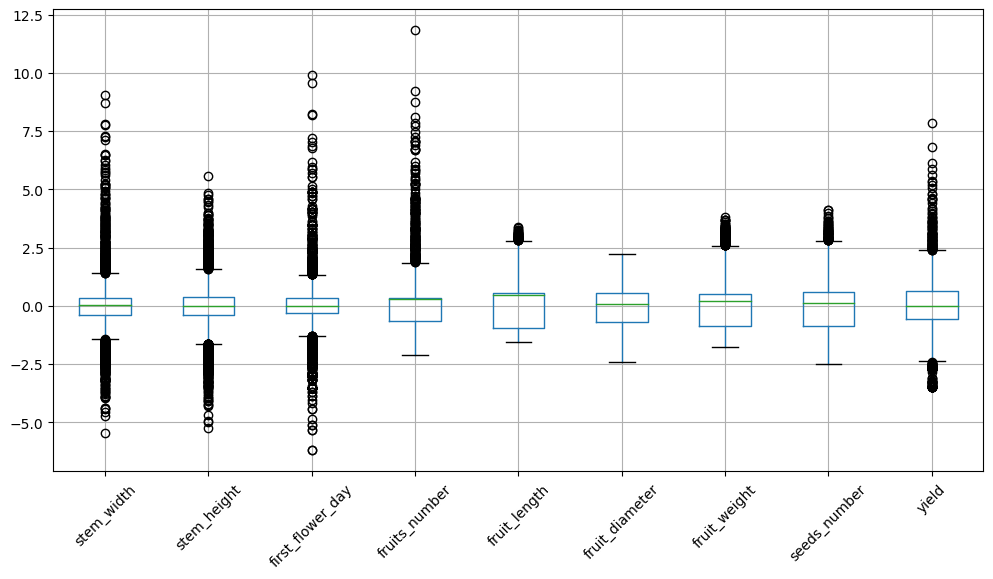

In [30]:
import matplotlib.pyplot as plt

phesim.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

In [14]:
import pandas as pd
import itertools
from typing import List, Optional

def phenotypic_similarity_bounded(
    df: pd.DataFrame,
    trait_cols: Optional[List[str]] = None,
    decimals: int = 4,
    range_method: str = "range",   # "range" (max-min) or "iqr"
    overall: bool = True
) -> pd.DataFrame:
    """
    Compute bounded phenotypic similarity in [0,1] for each trait and each pair of rows.

    similarity_k(i,j) = (R_k - abs(x_i - x_j)) / R_k
    where R_k is:
      - max_k - min_k   if range_method == "range"
      - 75th_k - 25th_k if range_method == "iqr" (more robust to outliers)

    Behavior and choices:
    - If trait_cols is None, numeric columns are auto-selected except column named 'individual' if present.
    - If R_k == 0 (all values identical) similarity is set to 1 for that trait.
    - If either x_i or x_j is NaN → similarity is NaN for that trait.
    - Output: DataFrame with "Comparison" column (1-based indices "i_j") and one column per trait.
      If overall=True an extra column "mean_similarity" is added (mean across traits, ignoring NaNs).
    - decimals: rounding for final values.
    """
    # defensive columns list
    cols = list(df.columns)

    # validate range_method
    if range_method not in ("range", "iqr"):
        raise ValueError("range_method must be 'range' or 'iqr'")

    # choose traits
    if trait_cols is not None:
        if not isinstance(trait_cols, (list, tuple)):
            raise TypeError("trait_cols must be a list/tuple of column names or None.")
        missing = [c for c in trait_cols if c not in cols]
        if missing:
            raise KeyError(f"The following requested columns do not exist in the DataFrame: {missing}")
        non_numeric = [c for c in trait_cols if not pd.api.types.is_numeric_dtype(df[c])]
        if non_numeric:
            raise TypeError(f"The following columns are not numeric: {non_numeric}")
        selected_traits = list(trait_cols)
    else:
        selected_traits = [c for c in cols if c != "individual" and pd.api.types.is_numeric_dtype(df[c])]

    if not selected_traits:
        numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
        raise ValueError(
            "No selectable traits found (selected_traits is empty). "
            f"Numeric columns in df: {numeric_cols}."
        )

    # compute range (R_k) per trait
    if range_method == "range":
        ranges = df[selected_traits].max() - df[selected_traits].min()
    else:  # iqr
        q75 = df[selected_traits].quantile(0.75)
        q25 = df[selected_traits].quantile(0.25)
        ranges = q75 - q25

    # ensure numeric Series indexed by selected_traits
    ranges = ranges[selected_traits]

    results = []
    nrows = len(df)
    for i, j in itertools.combinations(range(nrows), 2):
        row = {"Comparison": f"{i+1}_{j+1}"}
        sims = []
        for col in selected_traits:
            xi = df.iloc[i][col]
            xj = df.iloc[j][col]
            R = ranges.loc[col]
            # handle NaNs in data
            if pd.isna(xi) or pd.isna(xj):
                sim = float("nan")
            else:
                diff = abs(xi - xj)
                # if R is zero or NaN -> all values equal (or IQR==0); set similarity 1
                if pd.isna(R) or R == 0:
                    sim = 1.0
                else:
                    sim = (R - diff) / R
                    # numeric safety: clip to [0,1] in case of tiny floating errors or diff>R
                    if sim < 0:
                        sim = 0.0
                    elif sim > 1:
                        sim = 1.0
            row[col] = round(sim, decimals) if pd.notna(sim) else sim
            sims.append(sim)
        # compute overall mean similarity across traits (ignore NaNs)
        if overall:
            import numpy as _np
            # filter out NaNs
            valid = [_ for _ in sims if not (_ is None or _np.isnan(_))]
            mean_sim = float(_np.mean(valid)) if valid else float("nan")
            row["mean_similarity"] = round(mean_sim, decimals) if pd.notna(mean_sim) else mean_sim
        results.append(row)

    return pd.DataFrame(results)


In [15]:
nsf = phenotypic_similarity_bounded(mor)

In [16]:
nsf

,Comparison,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield,mean_similarity
0,1_2,0.9584,0.9685,0.9811,0.9968,0.9259,0.8949,0.9996,0.8360,0.8653,0.9363
1,1_3,0.9766,0.9291,0.6415,0.9960,0.7849,0.5390,0.4864,0.5023,0.6686,0.7249
2,1_4,0.9974,0.9213,1.0000,0.9992,0.9334,0.8814,0.9735,0.8812,0.9537,0.9490
3,1_5,0.9532,0.9528,1.0000,0.9944,0.9326,0.9966,0.8944,0.9246,0.7892,0.9375
4,1_6,0.9481,0.9528,1.0000,0.9928,0.9081,0.8610,0.8634,0.9328,0.7183,0.9086
...,...,...,...,...,...,...,...,...,...,...,...
6436,111_113,0.9299,0.9646,0.9057,0.9920,0.9842,0.9797,0.9726,0.9851,0.9530,0.9630
6437,111_114,0.9792,0.8819,0.7358,0.9992,0.9766,0.9322,0.9797,0.9753,0.9934,0.9393
6438,112_113,0.8753,0.8307,0.6792,0.9920,0.9842,0.9797,0.9726,0.9851,0.9530,0.9169
6439,112_114,0.7844,0.6772,0.9623,0.9992,0.9766,0.9322,0.9797,0.9753,0.9934,0.9200


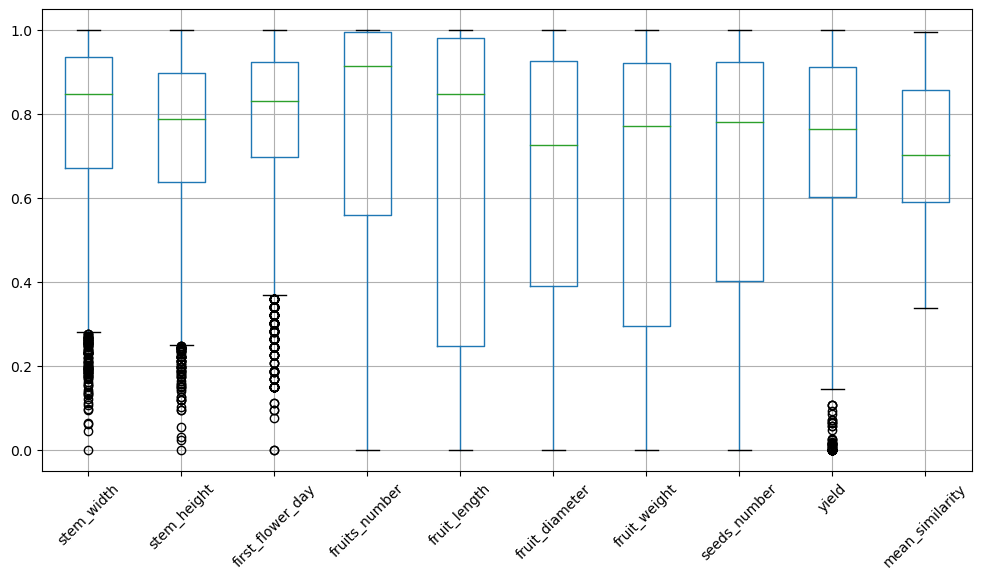

In [17]:
nsf.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()